In [51]:
# Разведывательный анализ данных (EDA)
# цели и задачи проекта:
# 1. Сформулировать предположения и гипотезы для дальнейшего построения модели.
# 2. Проверить качество данных и очистить их, если это необходимо.
# 3. Определиться с параметрами модели.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [88]:
# чтение файла данных
df = pd.read_csv('stud_math.xls')
#display(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [75]:
# Найдем количество уникальных значений в столбцах датасета
object_columns = [s for s in df.columns if df[s].dtypes == 'object']
for column in object_columns:
    unique = df[column].unique()
    print('Количество уникальных значений для столбца',
          column, '-', len(unique), unique)

Количество уникальных значений для столбца school - 2 ['GP' 'MS']
Количество уникальных значений для столбца sex - 2 ['F' 'M']
Количество уникальных значений для столбца address - 3 ['U' nan 'R']
Количество уникальных значений для столбца famsize - 3 [nan 'GT3' 'LE3']
Количество уникальных значений для столбца Pstatus - 3 ['A' nan 'T']
Количество уникальных значений для столбца Mjob - 6 ['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество уникальных значений для столбца Fjob - 6 ['teacher' 'other' nan 'health' 'services' 'at_home']
Количество уникальных значений для столбца reason - 5 ['course' 'other' 'home' 'reputation' nan]
Количество уникальных значений для столбца guardian - 4 ['mother' 'father' 'other' nan]
Количество уникальных значений для столбца schoolsup - 3 ['yes' 'no' nan]
Количество уникальных значений для столбца famsup - 3 ['no' 'yes' nan]
Количество уникальных значений для столбца paid - 3 ['no' nan 'yes']
Количество уникальных значений для столбца activiti

In [70]:
def first_look(col, boundaries=None):
        print('Столбец', col),
        print('Распределение признака:'),
        fig, ax = plt.subplots()
        if df.loc[:, col].dtype == np.dtype('O'):
            sns.countplot(df.loc[:, col], ax=ax)
            plt.show()
        else:
            df.loc[:, col].hist(ax=ax)
            ax.set_xlabel(col)
            ax.set_ylabel('count')
            plt.show()
    
            if boundaries is not None:  # Проверка на наличие выбросов по информации из датасета\n",
                if df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                            pd.notnull(df.loc[:, col])].shape[0] > 0:
                    print('Найдены выбросы:')
                    display(df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                                     pd.notnull(df.loc[:, col])])
    
        print(f'Процент пропусков: {np.round(df.loc[:, col].isna().sum()/df.shape[0] * 100, 2)}%')
        print(f'Число пропусков: {df.loc[:, col].isna().sum()}', end='\n\n')

Столбец school
Распределение признака:


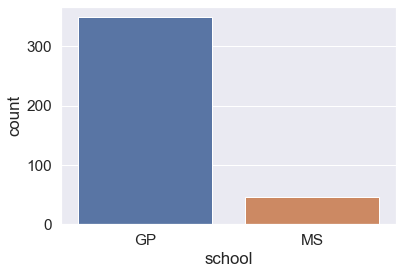

Процент пропусков: 0.0%
Число пропусков: 0

Столбец sex
Распределение признака:


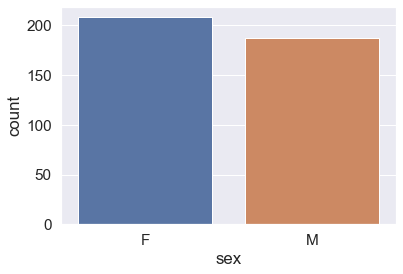

Процент пропусков: 0.0%
Число пропусков: 0

Столбец age
Распределение признака:


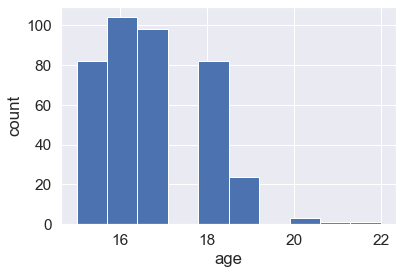

Процент пропусков: 0.0%
Число пропусков: 0

Столбец address
Распределение признака:


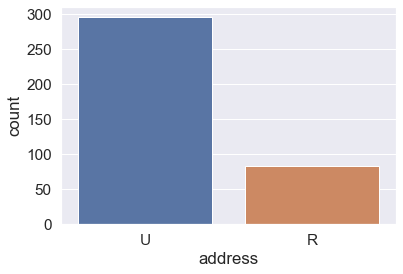

Процент пропусков: 4.3%
Число пропусков: 17

Столбец famsize
Распределение признака:


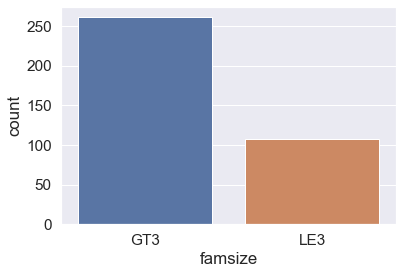

Процент пропусков: 6.84%
Число пропусков: 27

Столбец Pstatus
Распределение признака:


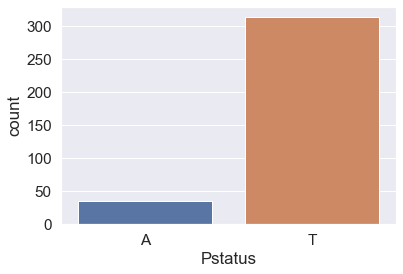

Процент пропусков: 11.39%
Число пропусков: 45

Столбец Medu
Распределение признака:


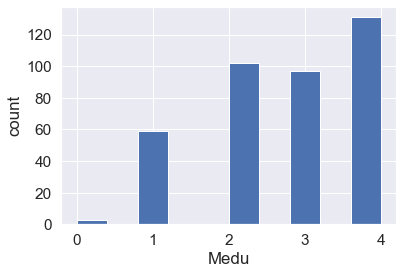

Процент пропусков: 0.76%
Число пропусков: 3

Столбец Fedu
Распределение признака:


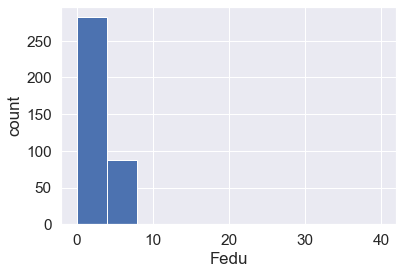

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Процент пропусков: 6.08%
Число пропусков: 24

Столбец Mjob
Распределение признака:


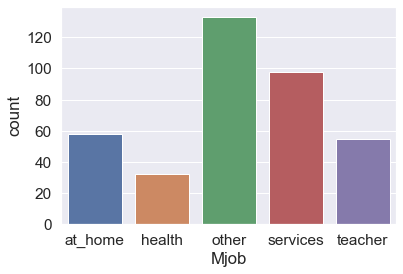

Процент пропусков: 4.81%
Число пропусков: 19

Столбец Fjob
Распределение признака:


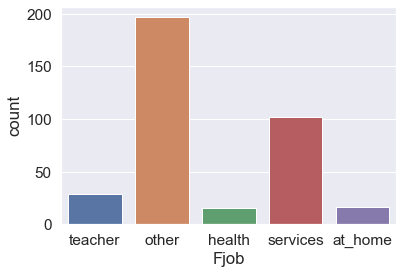

Процент пропусков: 9.11%
Число пропусков: 36

Столбец reason
Распределение признака:


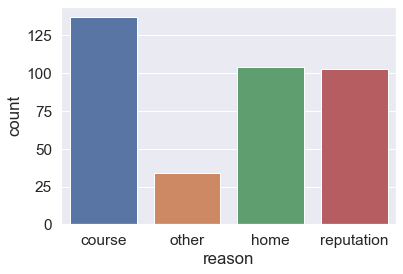

Процент пропусков: 4.3%
Число пропусков: 17

Столбец guardian
Распределение признака:


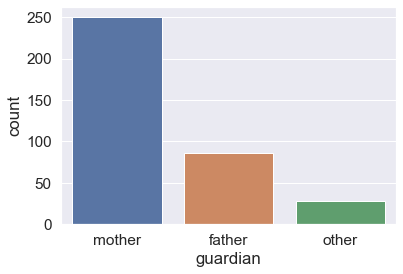

Процент пропусков: 7.85%
Число пропусков: 31

Столбец traveltime
Распределение признака:


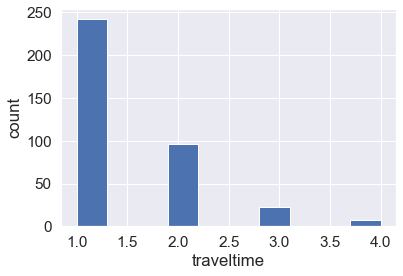

Процент пропусков: 7.09%
Число пропусков: 28

Столбец studytime
Распределение признака:


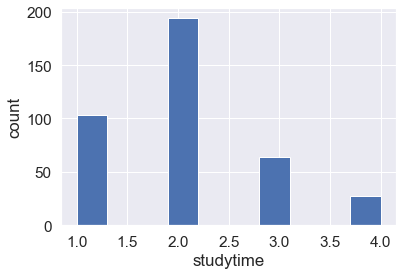

Процент пропусков: 1.77%
Число пропусков: 7

Столбец failures
Распределение признака:


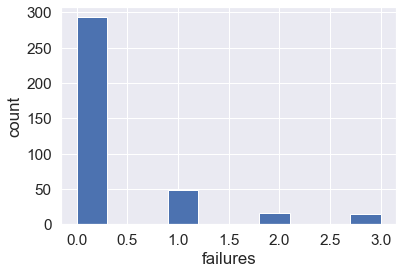

Процент пропусков: 5.57%
Число пропусков: 22

Столбец schoolsup
Распределение признака:


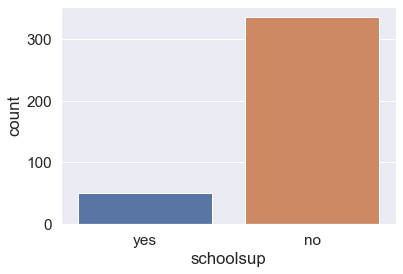

Процент пропусков: 2.28%
Число пропусков: 9

Столбец famsup
Распределение признака:


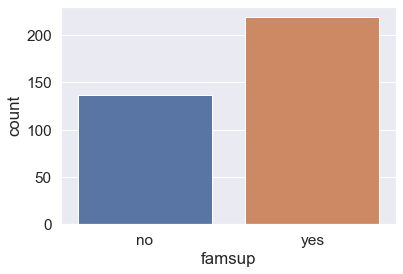

Процент пропусков: 9.87%
Число пропусков: 39

Столбец paid
Распределение признака:


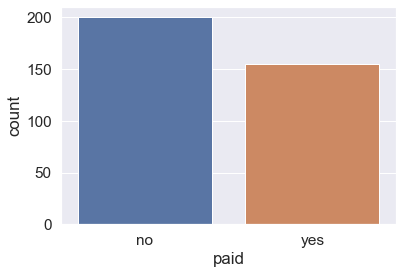

Процент пропусков: 10.13%
Число пропусков: 40

Столбец activities
Распределение признака:


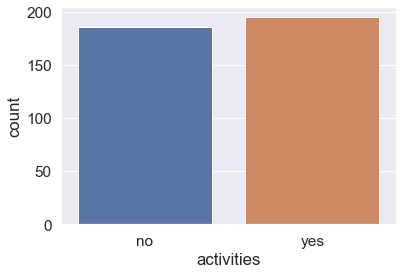

Процент пропусков: 3.54%
Число пропусков: 14

Столбец nursery
Распределение признака:


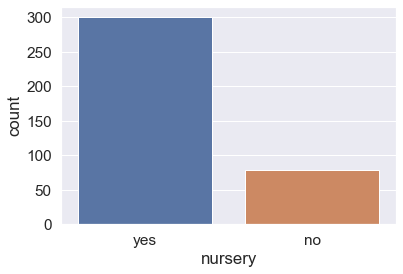

Процент пропусков: 4.05%
Число пропусков: 16

Столбец studytime, granular
Распределение признака:


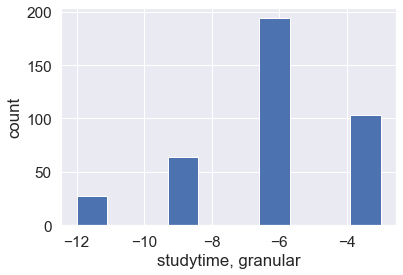

Процент пропусков: 1.77%
Число пропусков: 7

Столбец higher
Распределение признака:


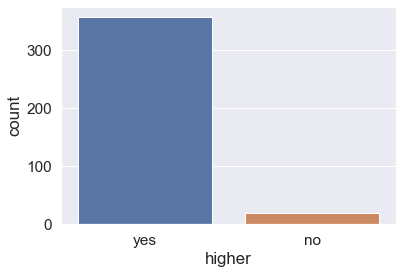

Процент пропусков: 5.06%
Число пропусков: 20

Столбец internet
Распределение признака:


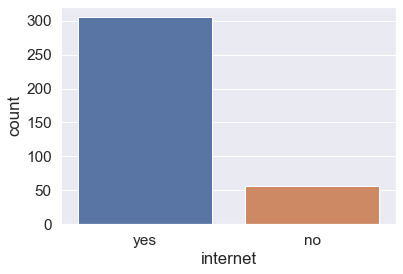

Процент пропусков: 8.61%
Число пропусков: 34

Столбец romantic
Распределение признака:


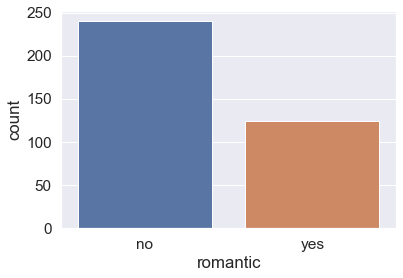

Процент пропусков: 7.85%
Число пропусков: 31

Столбец famrel
Распределение признака:


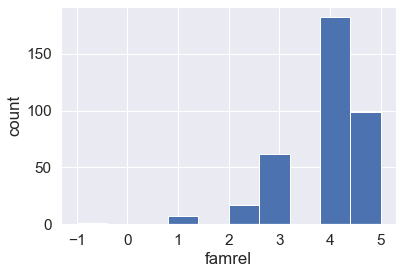

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Процент пропусков: 6.84%
Число пропусков: 27

Столбец freetime
Распределение признака:


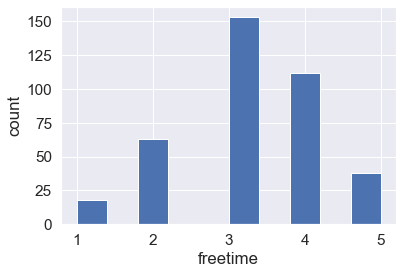

Процент пропусков: 2.78%
Число пропусков: 11

Столбец goout
Распределение признака:


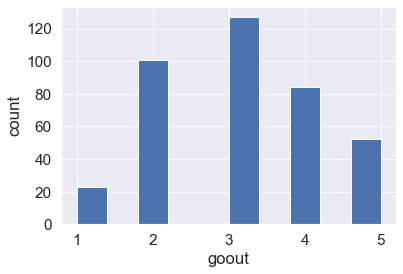

Процент пропусков: 2.03%
Число пропусков: 8

Столбец health
Распределение признака:


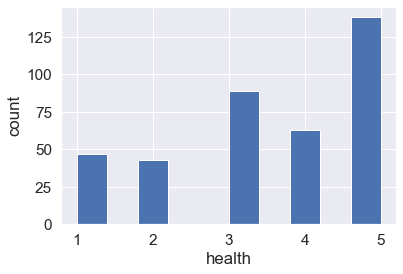

Процент пропусков: 3.8%
Число пропусков: 15

Столбец absences
Распределение признака:


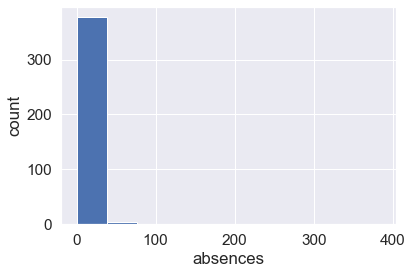

Процент пропусков: 3.04%
Число пропусков: 12

Столбец score
Распределение признака:


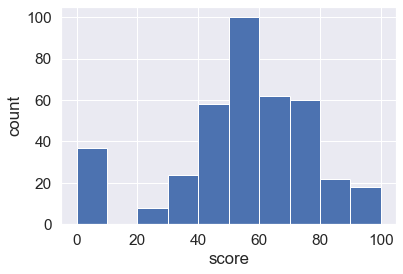

Процент пропусков: 1.52%
Число пропусков: 6



In [71]:
boundaries = {'school': None, 'sex': None, 'age': (15, 22), 'address': None, 'famsize': None, 'Pstatus': None, 'Medu': (0, 4), 'Fedu': (0, 4), 'Mjob': None, 'Fjob': None, 'reason': None, 'guardian': None, 'traveltime': (1, 4), 'studytime': (1, 4), 'failures': (
    0, 3), 'schoolsup': None, 'famsup': None, 'paid': None, 'activities': None, 'nursery': None,'studytime, granular': None, 'higher': None, 'internet': None, 'romantic': None, 'famrel': (1, 5), 'freetime': (1, 5), 'goout': (1, 5), 'health': (1, 5), 'absences': None, 'score': (0, 100)}

# Для каждого столбца: определяем процент и число пропусков + находим выбросы
for col in df.columns:
    first_look(col, boundaries[col])

In [56]:
#df = df.loc[df.Fedu.between(0,4) | pd.isna(df.Fedu)]
#df = df.loc[df.famrel.between(1,5) | pd.isna(df.famrel)]

Выбросы для столбцов Fedu и famrel пока не удаляем, так как возможно эти столбцы будут исключены из итоговой модели

In [89]:
# Удаляем строки в которых целевая переменная null
df.dropna(subset=['score'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [90]:
# помотрим количество записей с пропусками (NaN)
df.isnull().sum()

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

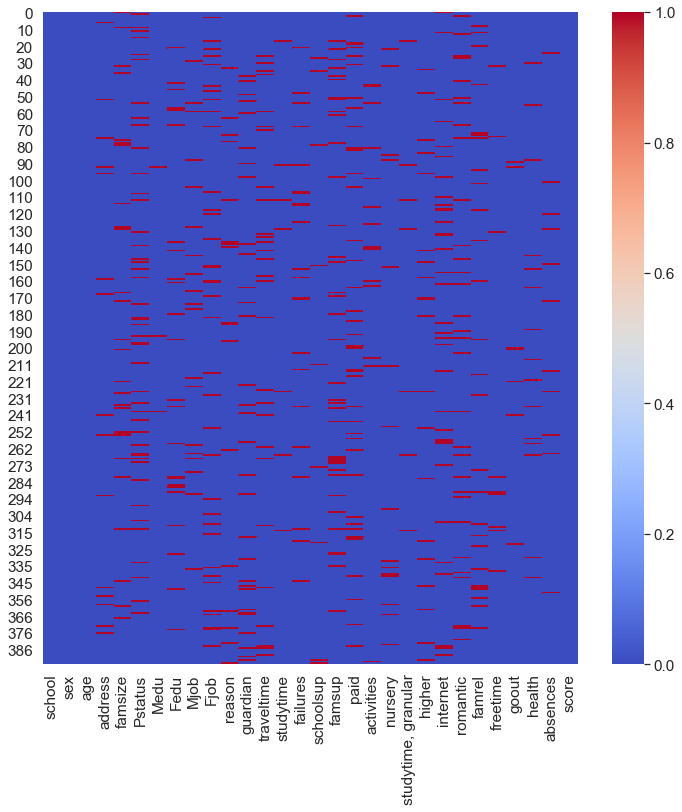

In [91]:
 # Построение тепловой карты для пропусков
plt.figure(figsize=(12, 12))
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

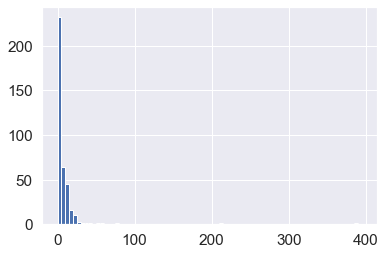

In [80]:
# Рассмотрим столбец absences
df.absences.hist(bins=list(range(0, 400, 5)))

In [62]:
# Функция вычисления допустимых границ
def calc_lower_upper(column):
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25
    return (perc25 - 1.5*IQR ,perc75 + 1.5*IQR )

#df = df.loc[df.absences.between(0,100) | pd.isnull(df.absences)]
lower, upper = calc_lower_upper(df.absences)
lower, upper

(-12.0, 20.0)

In [63]:
# Посмотрим данные за пределами допустимых границ
df.loc[~df.absences.between(lower, upper) & pd.notna(df.absences)].absences

38      25.0
72      54.0
101     26.0
181     56.0
196     24.0
202     28.0
213     22.0
219    385.0
256     21.0
271     75.0
272     22.0
275     30.0
301     38.0
306     22.0
308     40.0
313     23.0
382    212.0
Name: absences, dtype: float64

In [ ]:
# Так как два значеиния (385 и 212) почти на порядок отличаются от основных, то лучше фильтровать по верхней границе в 100
# df = df.loc[df.absences.between(lower, 100) | pd.notna(df.absences)]

Выбросы для столбца absences пока не удаляем, так как возможно этот столбец будет исключен из итоговой модели

In [92]:
# все остальные записи для числовыx столбцов содержащие NaN, заполняем значением медианы
df.fillna(df.median(), inplace=True)

In [93]:
# Корреляционный анализ. Так как большая часть признаков - ранговые, то используем method='spearman'
corr = df.corr(method='spearman')
corr

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.144541,-0.132350,0.112288,0.015101,0.204579,-0.015101,0.033454,-0.007269,0.135463,-0.079524,0.144137,-0.164656
Medu,-0.144541,1.000000,0.606833,-0.122658,0.081557,-0.240470,-0.081557,0.011295,0.038586,0.073807,-0.040776,0.089619,0.217671
Fedu,-0.132350,0.606833,1.000000,-0.108116,0.047724,-0.234609,-0.047724,-0.007194,-0.010134,0.057990,0.024439,0.020652,0.142110
traveltime,0.112288,-0.122658,-0.108116,1.000000,-0.103280,0.033098,0.103280,-0.045358,-0.029051,0.022515,-0.064466,-0.016570,-0.066765
studytime,0.015101,0.081557,0.047724,-0.103280,1.000000,-0.154511,-1.000000,0.060164,-0.109792,-0.055184,-0.092359,-0.043409,0.122243
failures,0.204579,-0.240470,-0.234609,0.033098,-0.154511,1.000000,0.154511,-0.023538,0.086803,0.088812,0.101134,0.096459,-0.345938
"studytime, granular",-0.015101,-0.081557,-0.047724,0.103280,-1.000000,0.154511,1.000000,-0.060164,0.109792,0.055184,0.092359,0.043409,-0.122243
famrel,0.033454,0.011295,-0.007194,-0.045358,0.060164,-0.023538,-0.060164,1.000000,0.153735,0.063705,0.072536,-0.081824,0.061075
freetime,-0.007269,0.038586,-0.010134,-0.029051,-0.109792,0.086803,0.109792,0.153735,1.000000,0.292891,0.081455,0.017859,0.002023
goout,0.135463,0.073807,0.057990,0.022515,-0.055184,0.088812,0.055184,0.063705,0.292891,1.000000,-0.024915,0.125035,-0.159435


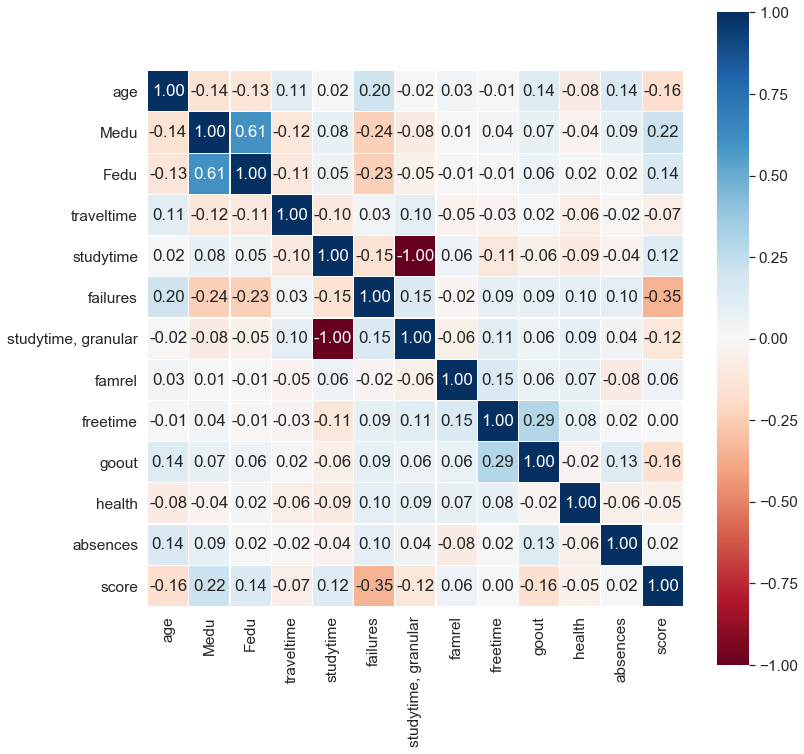

In [94]:
# Для большей нашлядности строим heatmap
sns.set(font_scale=1.4)
plt.subplots(figsize=(12, 12))
# annot=True, fmt = '.2f' - числовые подписи к данным с двумя знаками после запятой
sns.heatmap(corr, square=True, cmap='RdBu', linewidths=0.1, annot=True, fmt = '.2f')

In [95]:
# Сильная корреляция между столбцами studytime и studytime, granular, поэтому удаляем столбец studytime, granular
df.drop(columns=['studytime, granular'], inplace=True) #df.drop(['studytime, granular'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [96]:
# корреляционный анализ количественных переменных
scoreCorr = corr['score'].sort_values()
# Определим столбцы с корреляцией более 0.1
columns01 = scoreCorr.loc[abs(scoreCorr) < 0.1].index
display(columns01)
# Корреляция со score менее 0.1 для 'traveltime', 'index', 'health', 'freetime', 'absences', 'famrel'
# Удалим эти столбцы
for col in columns01:
    df.drop([col], axis=1, inplace=True)

Index(['traveltime', 'health', 'freetime', 'absences', 'famrel'], dtype='object')

In [97]:
# Анализ номинативных переменных
def nominative_analysis(col):
    # Проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        print('Столбец', col)
        print('Распределение баллов по значениям признака:')
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=col, y='score', data=df, ax=ax),
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()
        permutations_all = list(combinations(
            df.loc[:, col].dropna().unique(), 2))
        for perm in permutations_all:
            # Учли поправку Бонферони
            if ttest_ind(df.loc[df.loc[:, col] == perm[0], 'score'].dropna(),
                         df.loc[df.loc[:, col] == perm[1], 'score'].dropna()).pvalue \
                    <= 0.05/len(permutations_all):
                print('Найдены статистически значимые различия для колонки', col)
                break
        print('----------------------------------')
        print()

Столбец school
Распределение баллов по значениям признака:


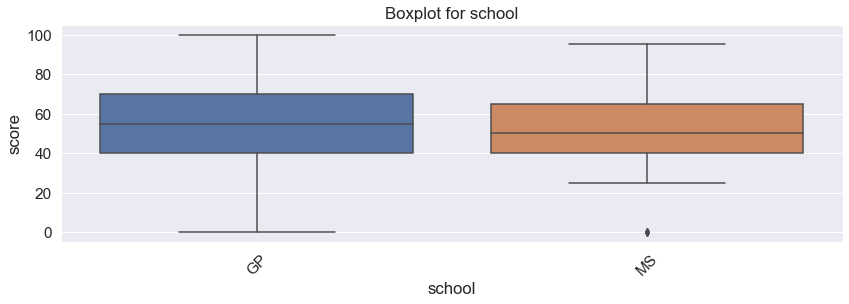

----------------------------------

Столбец sex
Распределение баллов по значениям признака:


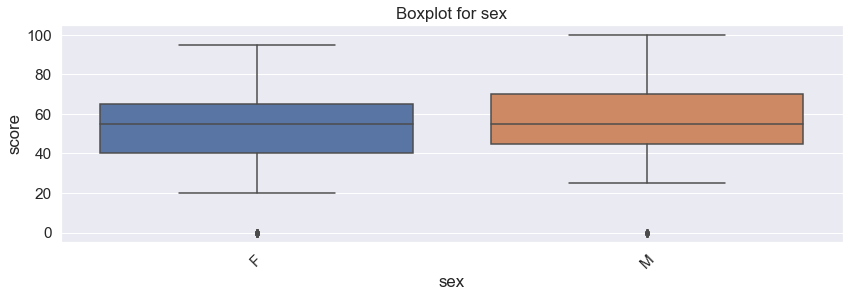

----------------------------------

Столбец address
Распределение баллов по значениям признака:


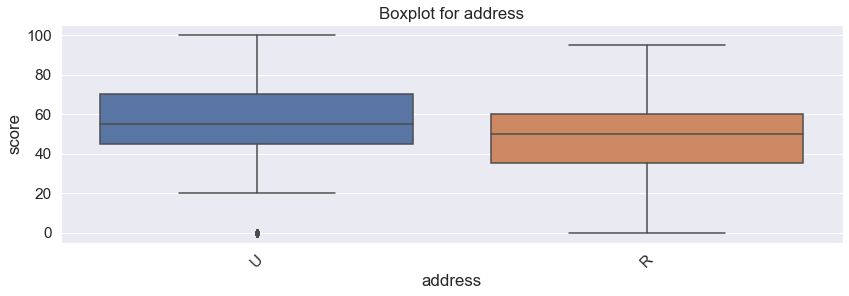

Найдены статистически значимые различия для колонки address
----------------------------------

Столбец famsize
Распределение баллов по значениям признака:


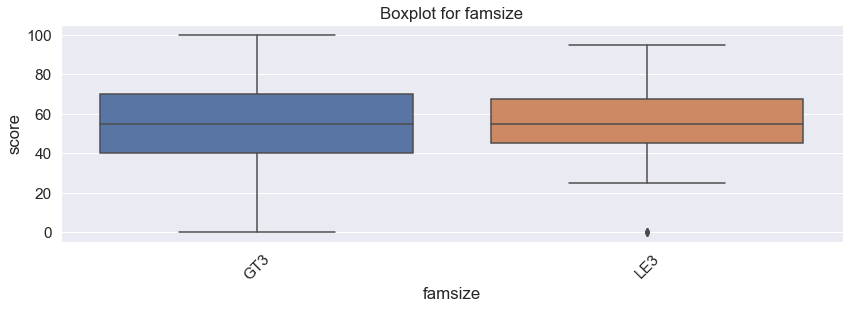

----------------------------------

Столбец Pstatus
Распределение баллов по значениям признака:


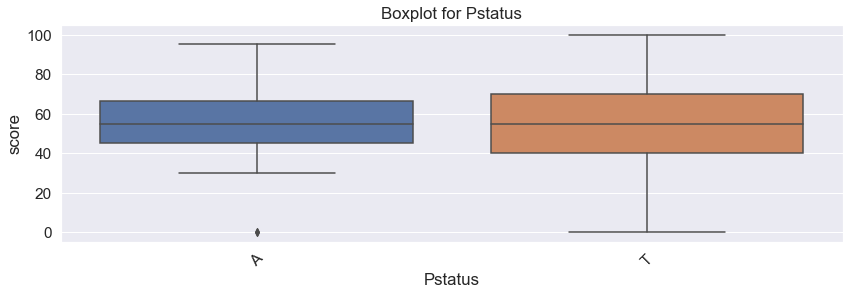

----------------------------------

Столбец Mjob
Распределение баллов по значениям признака:


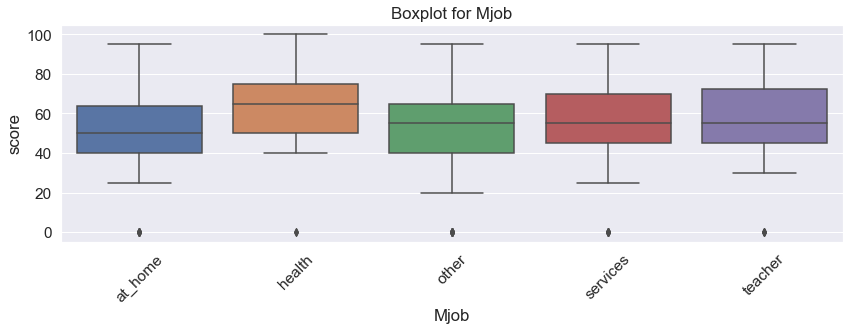

Найдены статистически значимые различия для колонки Mjob
----------------------------------

Столбец Fjob
Распределение баллов по значениям признака:


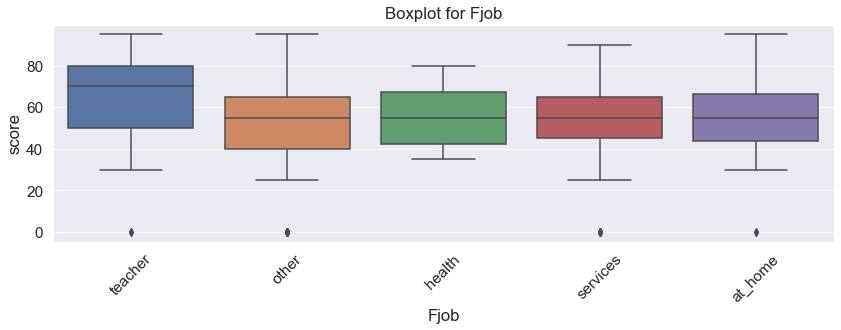

----------------------------------

Столбец reason
Распределение баллов по значениям признака:


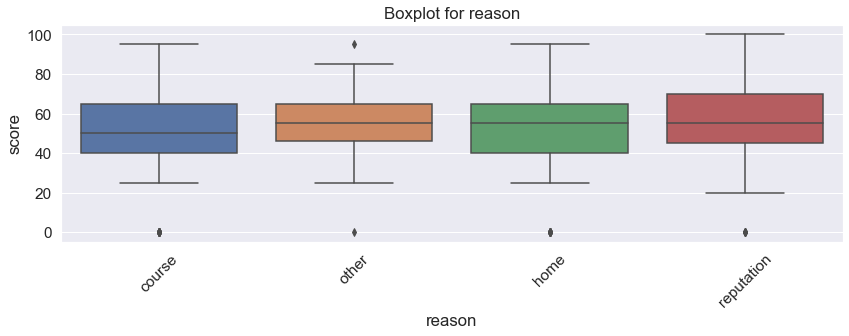

----------------------------------

Столбец guardian
Распределение баллов по значениям признака:


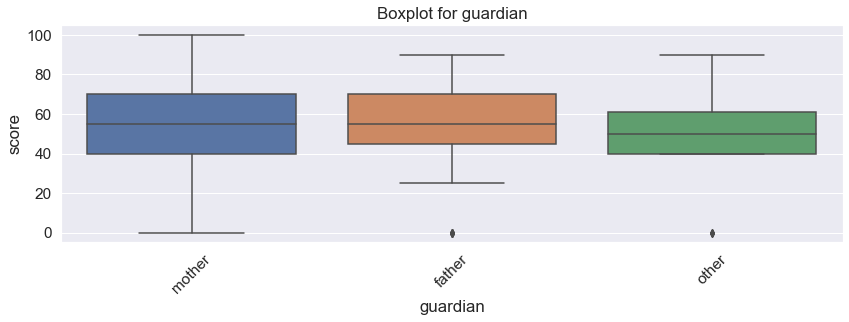

----------------------------------

Столбец schoolsup
Распределение баллов по значениям признака:


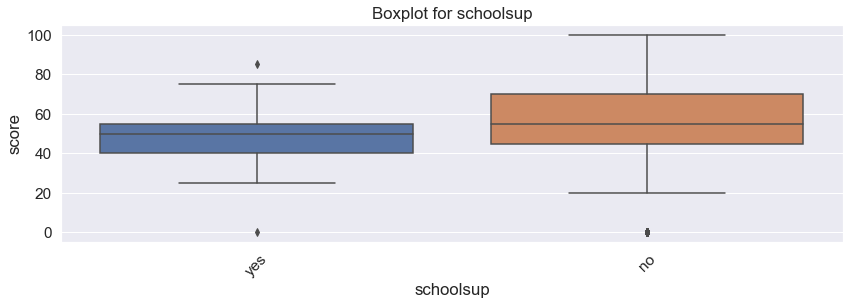

----------------------------------

Столбец famsup
Распределение баллов по значениям признака:


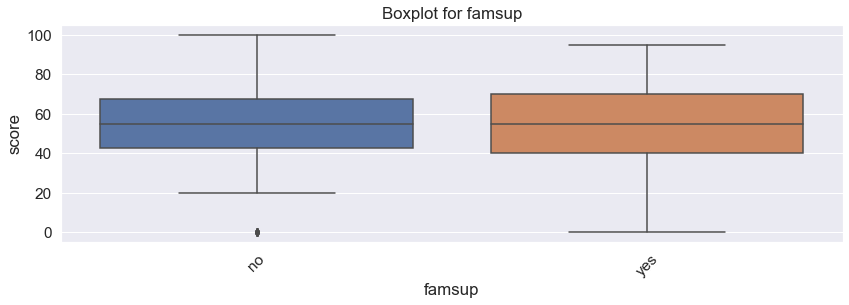

----------------------------------

Столбец paid
Распределение баллов по значениям признака:


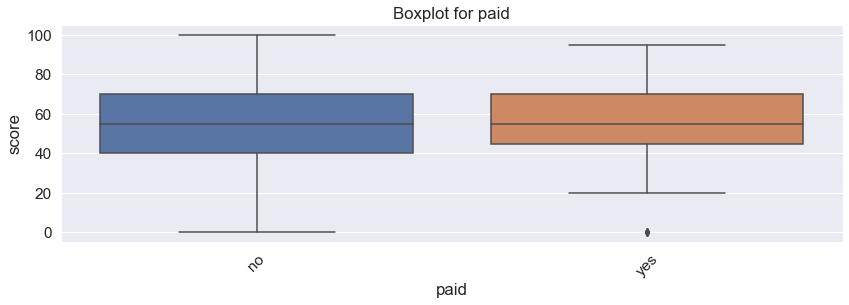

----------------------------------

Столбец activities
Распределение баллов по значениям признака:


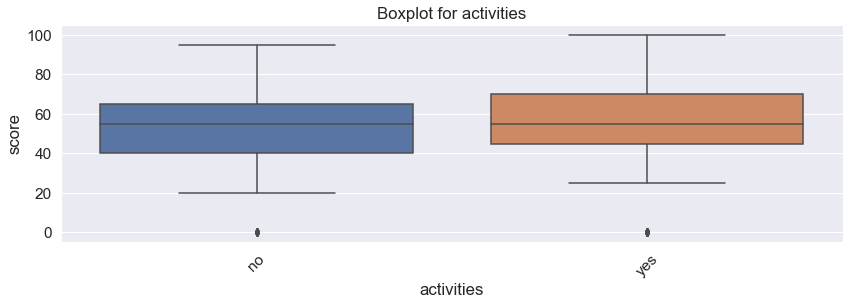

----------------------------------

Столбец nursery
Распределение баллов по значениям признака:


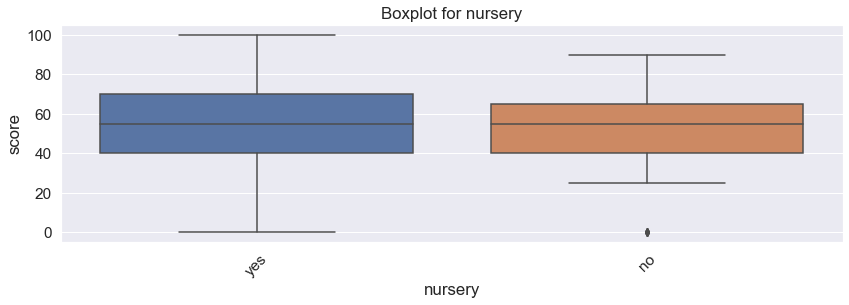

----------------------------------

Столбец higher
Распределение баллов по значениям признака:


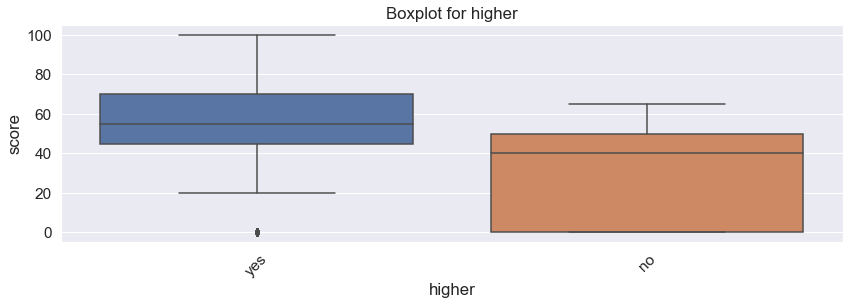

Найдены статистически значимые различия для колонки higher
----------------------------------

Столбец internet
Распределение баллов по значениям признака:


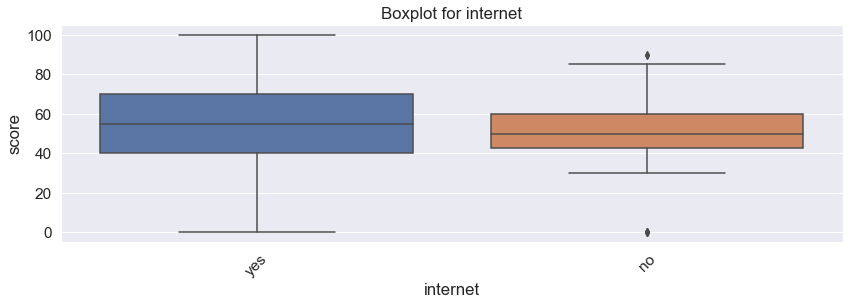

----------------------------------

Столбец romantic
Распределение баллов по значениям признака:


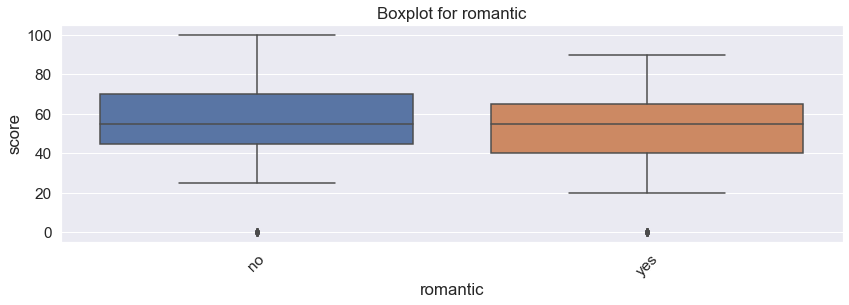

Найдены статистически значимые различия для колонки romantic
----------------------------------



In [98]:
for column in df.columns:
    nominative_analysis(column)

In [100]:
# Значимо отличаются распределения баллов только для колонок 'address', 'Mjob', 'higher', 'romantic'
# Остальные колонки лучше удалить
df.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian',
           'famsup', 'activities', 'nursery', 'internet'], axis=1, inplace=True)

KeyError: "['school' 'famsize' 'Pstatus' 'Fjob' 'reason' 'guardian' 'famsup'\n 'activities' 'nursery' 'internet'] not found in axis"

In [101]:
# Итоговый вывод: в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:
df

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,2.0,2.0,services,2.0,2.0,no,yes,yes,no,4.0,45.0
391,M,17,U,3.0,1.0,services,1.0,0.0,no,no,yes,no,5.0,80.0
392,M,21,R,1.0,1.0,other,1.0,3.0,NaN,no,NaN,no,3.0,35.0
393,M,18,R,3.0,2.0,services,1.0,0.0,no,no,yes,no,1.0,50.0


In [105]:
# Из трех столбцов с выбросами остался только Fedu, удалим выбросы
df = df.loc[df.Fedu.between(0,4) | pd.isna(df.Fedu)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        388 non-null    object 
 1   age        388 non-null    int64  
 2   address    373 non-null    object 
 3   Medu       388 non-null    float64
 4   Fedu       388 non-null    float64
 5   Mjob       369 non-null    object 
 6   studytime  388 non-null    float64
 7   failures   388 non-null    float64
 8   schoolsup  379 non-null    object 
 9   paid       349 non-null    object 
 10  higher     368 non-null    object 
 11  romantic   357 non-null    object 
 12  goout      388 non-null    float64
 13  score      388 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 45.5+ KB


# Итоговые выводы